# Lab 05

##Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

##Problem 01


###Part 01


In [2]:
df=make_moons(n_samples=1000,shuffle=True,noise=0.3,random_state=42)
temp=np.c_[(df[0],df[1])]
df=pd.DataFrame(temp,columns=['X1','X2','Y'])
df


,X1,X2,Y
0,-0.171863,0.596249,1.0
1,1.253283,-0.265414,1.0
2,0.723224,0.231943,1.0
3,-0.065198,-0.655194,1.0
4,-0.799493,0.552935,0.0
...,...,...,...
995,0.861014,0.343843,0.0
996,-0.229425,0.754849,0.0
997,1.770957,-0.509436,1.0
998,-1.061772,0.006786,0.0


<AxesSubplot:xlabel='X1', ylabel='X2'>

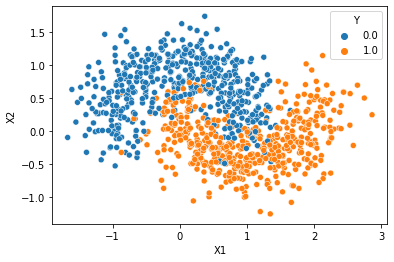

In [3]:
sns.scatterplot(data=df,x='X1',y='X2',hue='Y')

<AxesSubplot:xlabel='X1', ylabel='X2'>

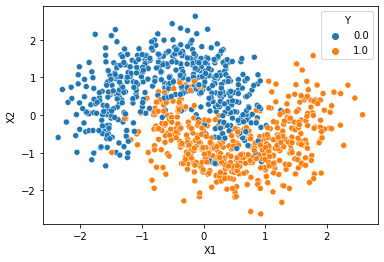

In [4]:
sc=StandardScaler()
new_df=df.copy()
sc.fit(new_df[['X1','X2']])
new_df[['X1','X2']]=sc.transform(df[['X1','X2']])
# new_df['X2']=sc.transform(df['X2'])
sns.scatterplot(data=new_df,x='X1',y='X2',hue='Y')


In [17]:
X=new_df[['X1','X2']].to_numpy()
Y=new_df['Y'].to_numpy()
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.3,shuffle=True)
print(X_train.shape,X_test.shape)

(700, 2) (300, 2)


(9,)
(9,)


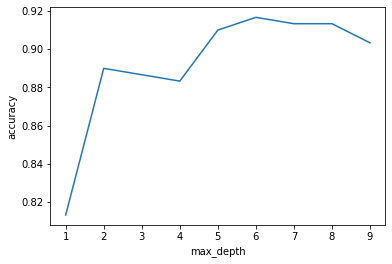

0.9166666666666666 6


In [ ]:
max_depth = np.arange(1,10,1)
print(max_depth.shape)
y_max_depth = np.zeros(max_depth.shape)
print(y_max_depth.shape)
max = 0
max_idx=-1
for i in max_depth:
  # print("for max depth = ",i)
  temp_reg=DTC(max_depth=i)
  temp_reg.fit(X_train,Y_train)

  y_pred_valid=temp_reg.predict(X_test)
  y_max_depth[i-1]=temp_reg.score(X_test,Y_test)
  # print("Score of the decision tree is ",temp_reg.score(X_valid,Y_valid))
  # print("mse of the decision tree is ",mse(y_pred_valid,Y_valid))
#   y_max_depth[i-2] = mse(y_pred_valid,Y_valid)
  if(y_max_depth[i-1]>max):
      max=y_max_depth[i-1]
      max_idx = i;
  


  # plt.rcParams['figure.figsize'] = [100, 10]

plt.plot(max_depth,y_max_depth)
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()
print(max,max_idx)


0.9166666666666666


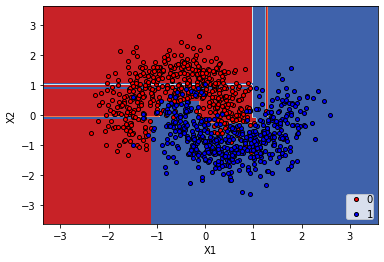

In [ ]:
new_clf_DTC= DTC(max_depth=6).fit(X_train,Y_train)
print(new_clf_DTC.score(X_test,Y_test))
n_classes = 2
plot_colors = "rb"
plot_step = 0.02




    
    

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = new_clf_DTC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")


plt.show()

0.9233333333333333


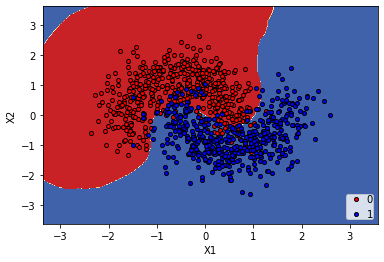

In [ ]:
new_clf_BDTC= BaggingClassifier(base_estimator=SVC(),n_estimators=10 ).fit(X_train,Y_train)
print(new_clf_BDTC.score(X_test,Y_test))
n_classes = 2
plot_colors = "rb"
plot_step = 0.02




    
    

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = new_clf_BDTC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")


plt.show()

0.9366666666666666


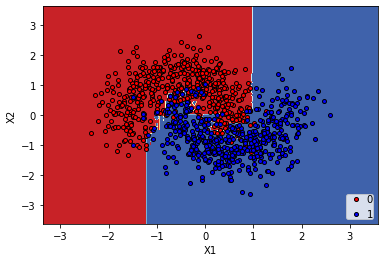

In [ ]:
new_clf_RFC= RandomForestClassifier().fit(X_train,Y_train)
print(new_clf_RFC.score(X_test,Y_test))
n_classes = 2
plot_colors = "rb"
plot_step = 0.02




    
    

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = new_clf_RFC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel("X1")
plt.ylabel("X2")

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(Y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")


plt.show()

The accuracies for all the three classifiers are as follows.
Decision tree classifier -> 0.9133
Bagging Classifier -> 0.91
Random Forest classifier -> 0.93

One with highest is random forest while other two have nearly same accuracies

1
0.9


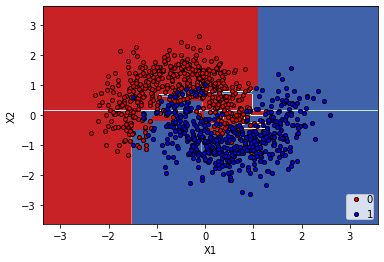




11
0.9233333333333333


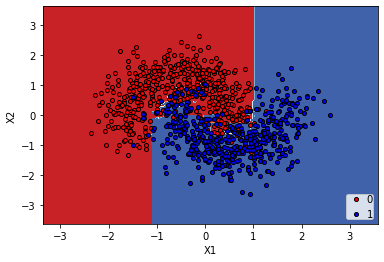




21
0.9333333333333333


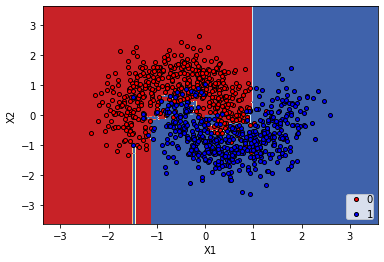




31
0.9366666666666666


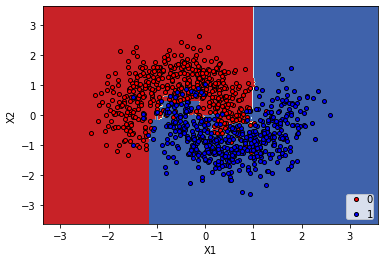




41
0.9333333333333333


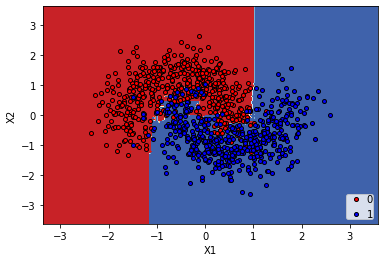




51
0.9466666666666667


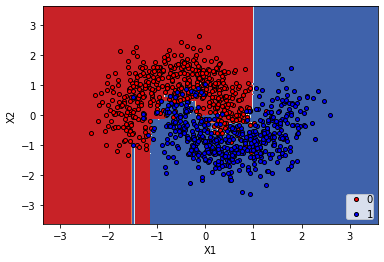




61
0.94


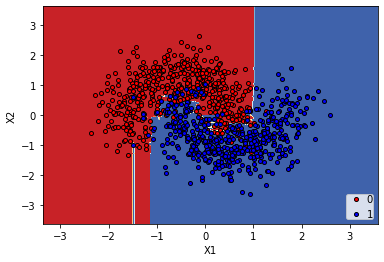




71
0.94


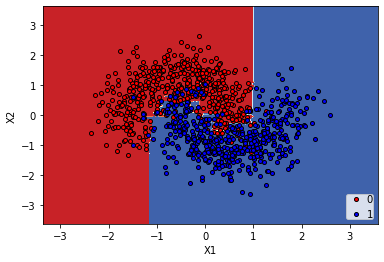




81
0.93


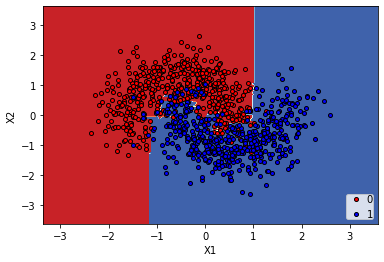




91
0.9366666666666666


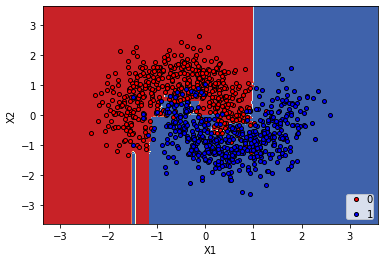

In [ ]:
for n in range(1,101,10):
    print(n)
    new_clf_RFC= RandomForestClassifier(n_estimators=n).fit(X_train,Y_train)
    print(new_clf_RFC.score(X_test,Y_test))
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02




        
        

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = new_clf_RFC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel("X1")
    plt.ylabel("X2")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")


    plt.show()
    print('\n\n')

1
0.92


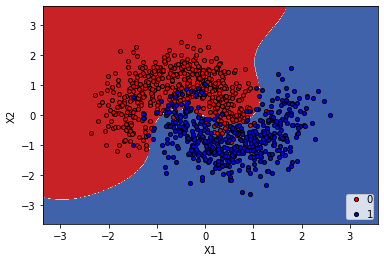




11
0.93


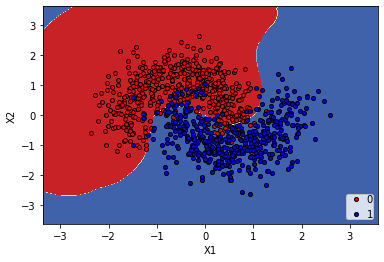




21
0.93


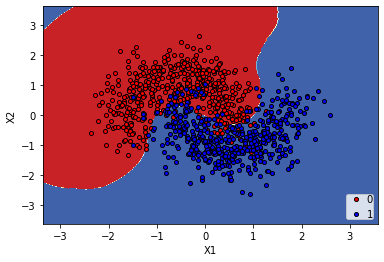




31
0.93


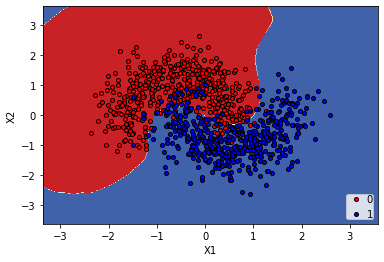




41
0.9266666666666666


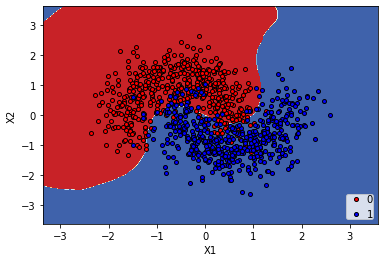




51
0.93


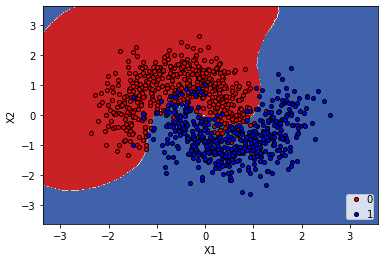




61
0.93


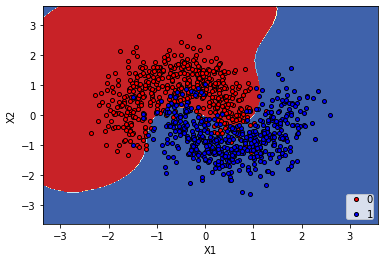




71
0.9266666666666666


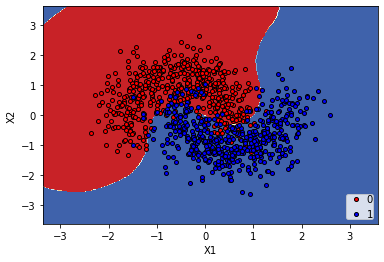




81
0.9266666666666666


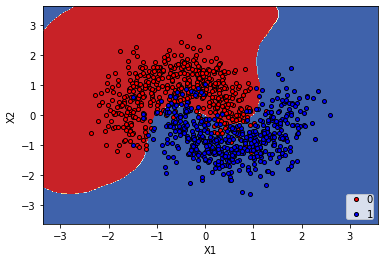




91
0.93


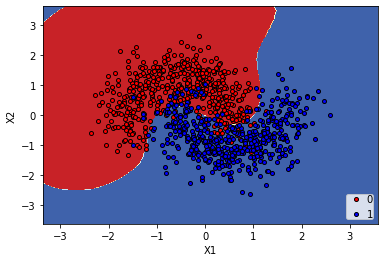

In [ ]:
for n in range(1,101,10):
    print(n)
    new_clf_RFC=  BaggingClassifier(base_estimator=SVC(),n_estimators=n ).fit(X_train,Y_train)
    print(new_clf_RFC.score(X_test,Y_test))
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02




        
        

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = new_clf_RFC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel("X1")
    plt.ylabel("X2")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")


    plt.show()
    print('\n\n')

The accuracies for the bagging tree classifier and random tree classifier are nearly equal even after varying the no of estimators

###Part 2


In [22]:
def plot_decision_boundary(clf,X,Y):
    # print(n)
    # new_clf_RFC=  BaggingClassifier(base_estimator=SVC(),n_estimators=n ).fit(X_train,Y_train)
    # print(new_clf_RFC.score(X_test,Y_test))
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.04




        
        

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel("X1")
    plt.ylabel("X2")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=i,
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=16)


    plt.legend(loc='lower right', borderpad=0, handletextpad=0)
    plt.axis("tight")


    plt.show()

In [ ]:
class Bagging_Classifier:
    #initializing the classifier by setting the number of estimators
    def __init__(self,n):
        self.n_estimators=n

    # training the classifier over datapoints. Here X and y are numpy arrays
    def train(self,X,y):
        temp=[]
        for i in range(self.n_estimators):
            #generating random indices to pick from the dataset
            idx=np.random.randint(0,X.shape[0],X.shape[0])

            #picking up the datapoints on the randomly chosen indices
            temp_X=X[idx]
            temp_y=y[idx]

            #training a new decision tree classifier on the randomly chosen datapoints
            clf=DTC()
            clf.fit(temp_X,temp_y)

            #appending the trained classifier to a list to create the ensemble
            temp.append(clf)
        self.classifiers=temp

    #predicting the class/labels for sample datapoints X. X is numpy array
    def predict(self,X):
        predictions=np.zeros((X.shape[0],self.n_estimators))
        pred=[]
        for i in range(X.shape[0]):
            temp=[]
            for n in range(self.n_estimators):
                # predicition by each estimator in the ensemble for each sample in X
                predictions[i][n]=self.classifiers[n].predict([X[i]])[0]
                temp.append(self.classifiers[n].predict([X[i]])[0])

            #assigning the most frequent class/label as the prediction of sample by the bagging classifier
            pred.append(np.bincount(temp).argmax())
        return pred

    #calculating accuracy of the classifier over given datapoints.
    def score(self,X,y):
        pred=self.predict(X)
        cnt=0
        for i in range(len(y)):
            if(y[i]==pred[i]):
                cnt+=1
        return cnt/len(y)

    #calculating individual score of each decision tree classifier in the ensemble on the given dataset
    def individual_score(self,X,y):
        scores=[]
        for n in range(self.n_estimators):
            scores.append(self.classifiers[n].score(X,y))
        return scores
    
    #plotting the decision boundary for individual estimators in the ensemble using the plot_decision_boundary function defined above current cell.
    def plot_decision_boudaries(self,X,y):
        for n in range(self.n_estimators):
            plot_decision_boundary(self.classifiers[n],X,y)



        



In [ ]:
bag_clf=Bagging_Classifier(10)
bag_clf.train(X_train,Y_train)
print(bag_clf.predict(X_test))
print(bag_clf.score(X_test,Y_test))

[1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0]
0.93


[0.9133333333333333, 0.8766666666666667, 0.9, 0.8966666666666666, 0.8766666666666667, 0.8566666666666667, 0.91, 0.8933333333333333, 0.9033333333333333, 0.91]
0.8936666666666667


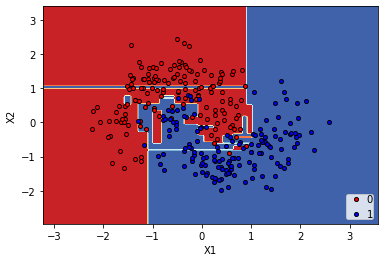

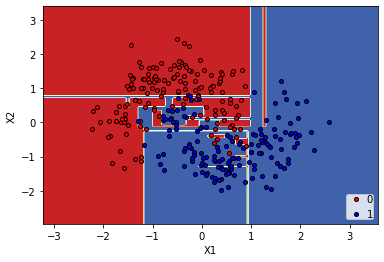

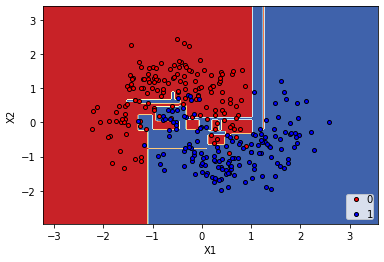

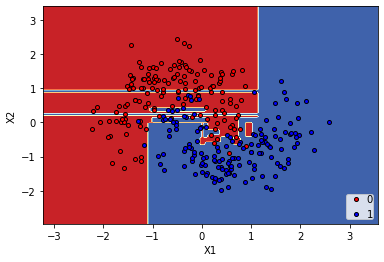

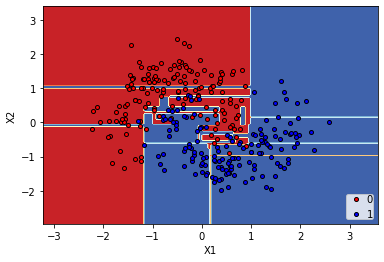

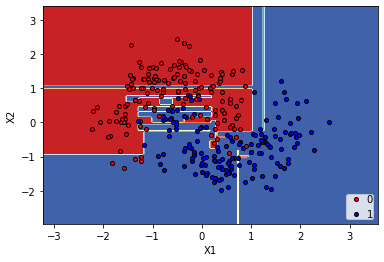

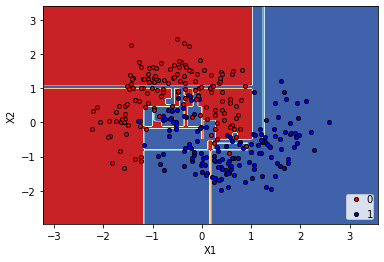

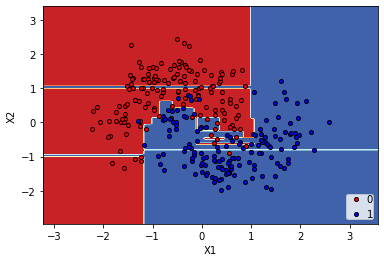

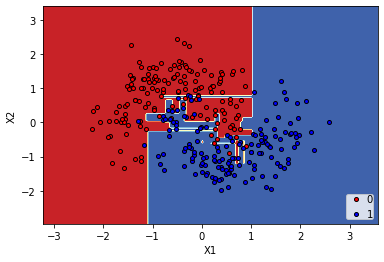

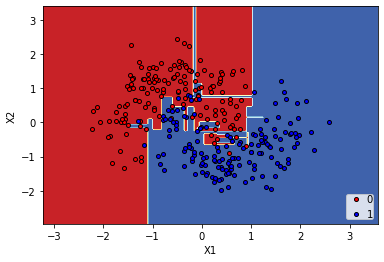

In [ ]:
scores=bag_clf.individual_score(X_test,Y_test)
print(scores)
print(np.mean(scores))
bag_clf.plot_decision_boudaries(X_test,Y_test)

##Problem 02

###importing models

In [6]:
!pip install xgboost
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

###Part 1

In [25]:
Adaboost_model=AdaBoostClassifier().fit(X_train,Y_train)

###Part 2

In [26]:
XGboost_model=XGBClassifier(subsample=0.7).fit(X_train,Y_train)

###Part 3

In [27]:
print("accuracy of Adaboost model on training data",Adaboost_model.score(X_train,Y_train))
print("accuracy of Adaboost model on testing data",Adaboost_model.score(X_test,Y_test))

print("accuracy of XGboost model on training data",XGboost_model.score(X_train,Y_train))
print("accuracy of XGboost model on testing data",XGboost_model.score(X_test,Y_test))

accuracy of Adaboost model on training data 0.9385714285714286
accuracy of Adaboost model on testing data 0.92
accuracy of XGboost model on training data 0.9471428571428572
accuracy of XGboost model on testing data 0.9166666666666666


###Part 4

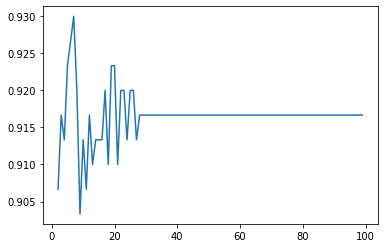

[0.9066666666666666,
 0.9166666666666666,
 0.9133333333333333,
 0.9233333333333333,
 0.9266666666666666,
 0.93,
 0.92,
 0.9033333333333333,
 0.9133333333333333,
 0.9066666666666666,
 0.9166666666666666,
 0.91,
 0.9133333333333333,
 0.9133333333333333,
 0.9133333333333333,
 0.92,
 0.91,
 0.9233333333333333,
 0.9233333333333333,
 0.91,
 0.92,
 0.92,
 0.9133333333333333,
 0.92,
 0.92,
 0.9133333333333333,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.9166666666666666,
 0.916

In [28]:
accuracies=[]
x=np.arange(2,100,1)
for n_leaves in range(2,100):
    temp=LGBMClassifier(num_leaves=n_leaves).fit(X_train,Y_train)
    accuracies.append(temp.score(X_test,Y_test))

plt.plot(x,accuracies)

plt.show()
accuracies

In [29]:
print(np.array(accuracies).max(),x[np.array(accuracies).argmax()])

0.93 7


###Part 5 & 6

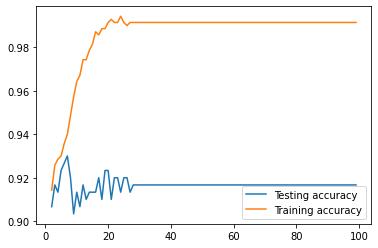

In [30]:
accuracy_training=[]
accuracy_testing=[]
for n_leaves in range(2,100):
    temp=LGBMClassifier(num_leaves=n_leaves).fit(X_train,Y_train)
    accuracy_training.append(temp.score(X_train,Y_train))
    accuracy_testing.append(temp.score(X_test,Y_test))
plt.plot(x,accuracy_testing,label='Testing accuracy')
plt.plot(x,accuracy_training,label='Training accuracy')
plt.legend()

plt.show()

###Part 7

Adaboost model


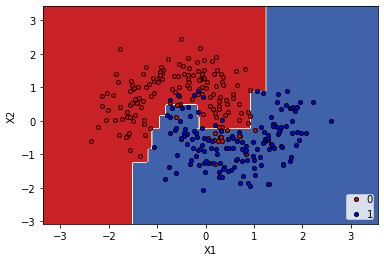

XGboost model


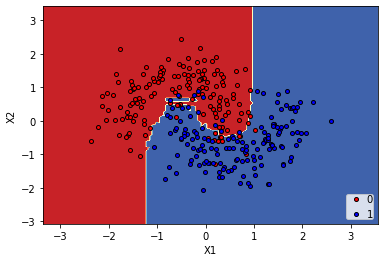

LGBM model


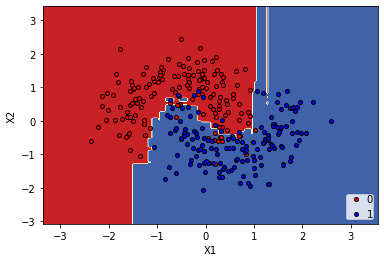

accuracy of Adaboost model 0.92
accuracy of XGboost model 0.9166666666666666
accuracy of LGBM model 0.93


In [31]:
LGBM_model=LGBMClassifier(num_leaves=7).fit(X_train,Y_train)
print("Adaboost model")
plot_decision_boundary(Adaboost_model,X_test,Y_test)
print("XGboost model")
plot_decision_boundary(XGboost_model,X_test,Y_test)
print("LGBM model")
plot_decision_boundary(LGBM_model,X_test,Y_test)

print("accuracy of Adaboost model",Adaboost_model.score(X_test,Y_test))
print("accuracy of XGboost model",XGboost_model.score(X_test,Y_test))
print("accuracy of LGBM model",LGBM_model.score(X_test,Y_test))





##Problem 03

0.8566666666666667


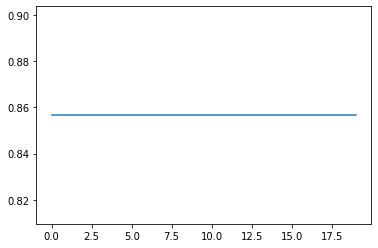

In [48]:
bayes_model=GaussianNB(priors=np.array([0.5,0.5])).fit(X_train,Y_train)
print(bayes_model.score(X_test,Y_test))

accuracies=[]
for var in range(-19,1):
    temp=GaussianNB(priors=np.array([0.5,0.5]),var_smoothing=10**var).fit(X_train,Y_train)
    accuracies.append(temp.score(X_test,Y_test))
plt.plot(accuracies)


In [49]:

clf=VotingClassifier(estimators=[('bayes model',bayes_model),('XGboost model',XGboost_model),('Adaboost model',Adaboost_model),('LGBM model',LGBM_model)],voting='hard')
clf.fit(X_train,Y_train)
print(clf.score(X_test,Y_test))

0.9133333333333333


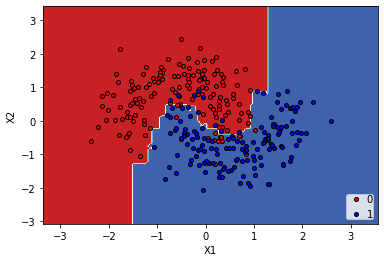

In [50]:

plot_decision_boundary(clf,X_test,Y_test)

In [52]:
print("Accurcay of Bayes model",bayes_model.score(X_test,Y_test))
print("Accurcay of XGBoost model",XGboost_model.score(X_test,Y_test))
print("Accurcay of Adaboost model",Adaboost_model.score(X_test,Y_test))
print("Accurcay of LightGBM model",LGBM_model.score(X_test,Y_test))
print("Accurcay of Voting classifier",clf.score(X_test,Y_test))

Accurcay of Bayes model 0.8566666666666667
Accurcay of XGBoost model 0.9166666666666666
Accurcay of Adaboost model 0.92
Accurcay of LightGBM model 0.93
Accurcay of Voting classifier 0.9133333333333333
